# Data Mining and Big Data Analytics 
### Instructor: Márton Karsai, Associate Professor

## 1st Hands-on session

Given the `breast cancer Wisconsin dataset` in scikit-learn, solve a tipical binary classification problem. 

The idea is to use all the tools we introduced so far in the class to find the best solution possible. In particular, the exercise should involve the following steps:


1. **Import libraries, load the data**

2. **Exploration and preparation**

    * check the imbalance in data
    * check missing values (if any)
    * understand the data better using plots
    * make some hypotheses using the plots and think about possible features representing them. Note that these features might/might not work when implemented in the real model.

3. **Train a Decision Tree classifier**

4. **Evaluate the performance of the classifier**

    * Elaborate on the different type of errors your classifier is making and use different metrics to have a complete picture of the model behavior.   

5. **Optimization**

    * Explore the hyperparameters space looking for the configuration that optimizes the model performance. 

6. **Train an alternative classifier (K-NN) and repeat steps 4-5**

7. **Decide wich approach to use if you were asked to solve the problem in a real case**

## 1. Import libraries, load the data

In [12]:
# Setting up matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

import numpy as np

# Setting up pandas
import pandas as pd

from pandas.plotting import scatter_matrix

C:\Users\45919\AppData\Local\Temp/ipykernel_1316/981701747.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X, y = data.data, data.target

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 2. Exploration and preparation

    * check the imbalance in data
    * check missing values (if any)
    * understand the data better using plots
    * make some hypotheses using the plots and think about possible features representing them. Note that these features might/might not work when implemented in the real model.

Create a pandas dataframe for the data exploration phase

In [4]:
df = pd.DataFrame(X, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Explicite ToDo List:
* Print feature names
* Print target names 
* Count null values in the data
* Describe the data
* Identify outliers of a feature (e.g. 'mean perimeter') = instances with any feature value 3 STD further than the population average
* Plot the boxplot and distribution of a selected feature (e.g. 'mean perimeter')
* Remove missing values
* Check the imbalance of the data by computing the variance of each features over the population
* Plot feature distributions and correlaitons using scatter_matrix
* Reduce the number of features by replacing those which are strongly correlated by only one
* Drop all the features which are not the mean values of different metrics
* Plot feature distributions and correlaitons using scatter_matrix if the filtered features

In [13]:
# Add your code
print("Feature names are:", data.feature_names)
print("Target names:", data.target_names)
print("Number of null values:", df.isnull().sum())
print(df.describe())
outliers = np.abs(df['mean perimeter'] - df['mean perimeter'].mean()) > 3 * df['mean perimeter'].std()
print(df[outliers])


Feature names are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Number of null values: mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error   

In [15]:
outliers = np.abs(df['mean perimeter'] - df['mean perimeter'].mean()) > 3*df["mean perimeter"].std()
print(df[outliers])

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
82         25.22         24.91           171.5     1878.0           0.1063   
122        24.25         20.20           166.2     1761.0           0.1447   
180        27.22         21.87           182.1     2250.0           0.1094   
212        28.11         18.47           188.5     2499.0           0.1142   
352        25.73         17.46           174.2     2010.0           0.1149   
461        27.42         26.27           186.9     2501.0           0.1084   
521        24.63         21.60           165.5     1841.0           0.1030   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
82             0.2665          0.3339               0.1845         0.1829   
122            0.2867          0.4268               0.2012         0.2655   
180            0.1914          0.2871               0.1878         0.1800   
212            0.1516          0.3201               0.1595         

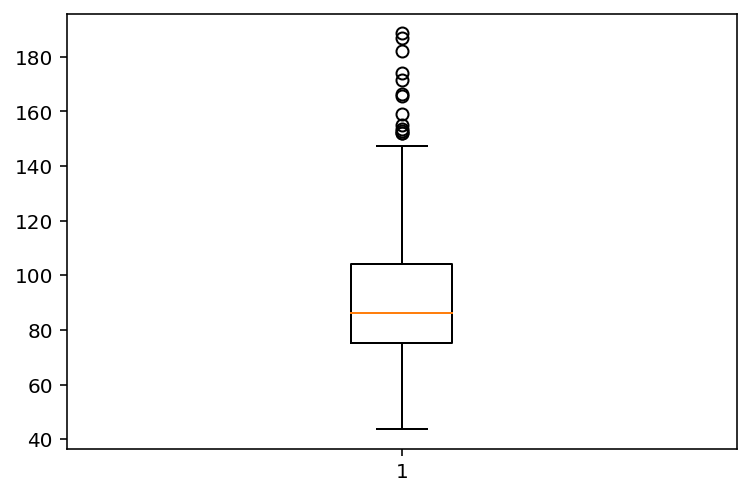

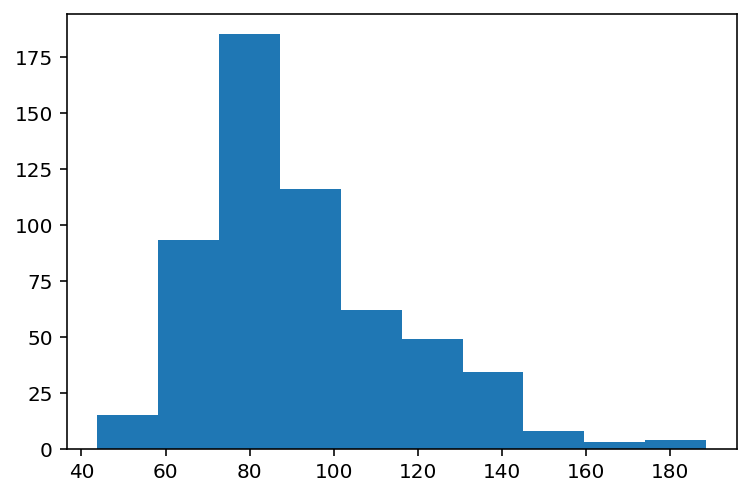

mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst perimeter              1129.130847
worst area                 324167.385102
worst smoothness

In [16]:
plt.boxplot(df['mean perimeter'])
plt.show()

plt.hist(df['mean perimeter'])
plt.show()

df.dropna(inplace=True)

print(df.var())


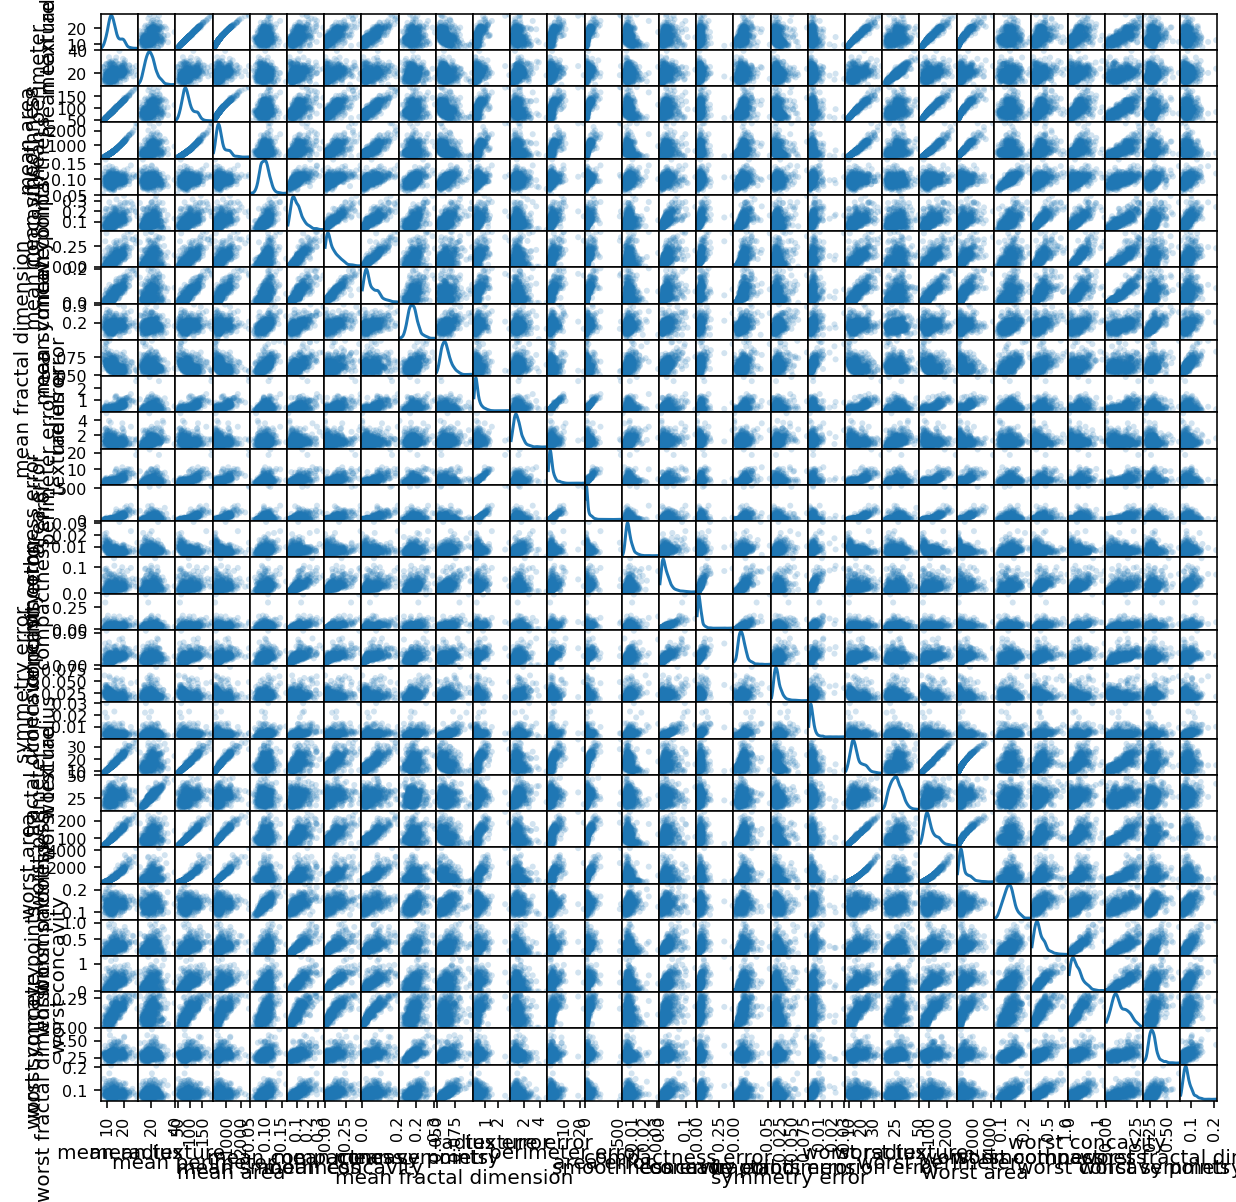

C:\Users\45919\AppData\Local\Temp/ipykernel_1316/2682229955.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


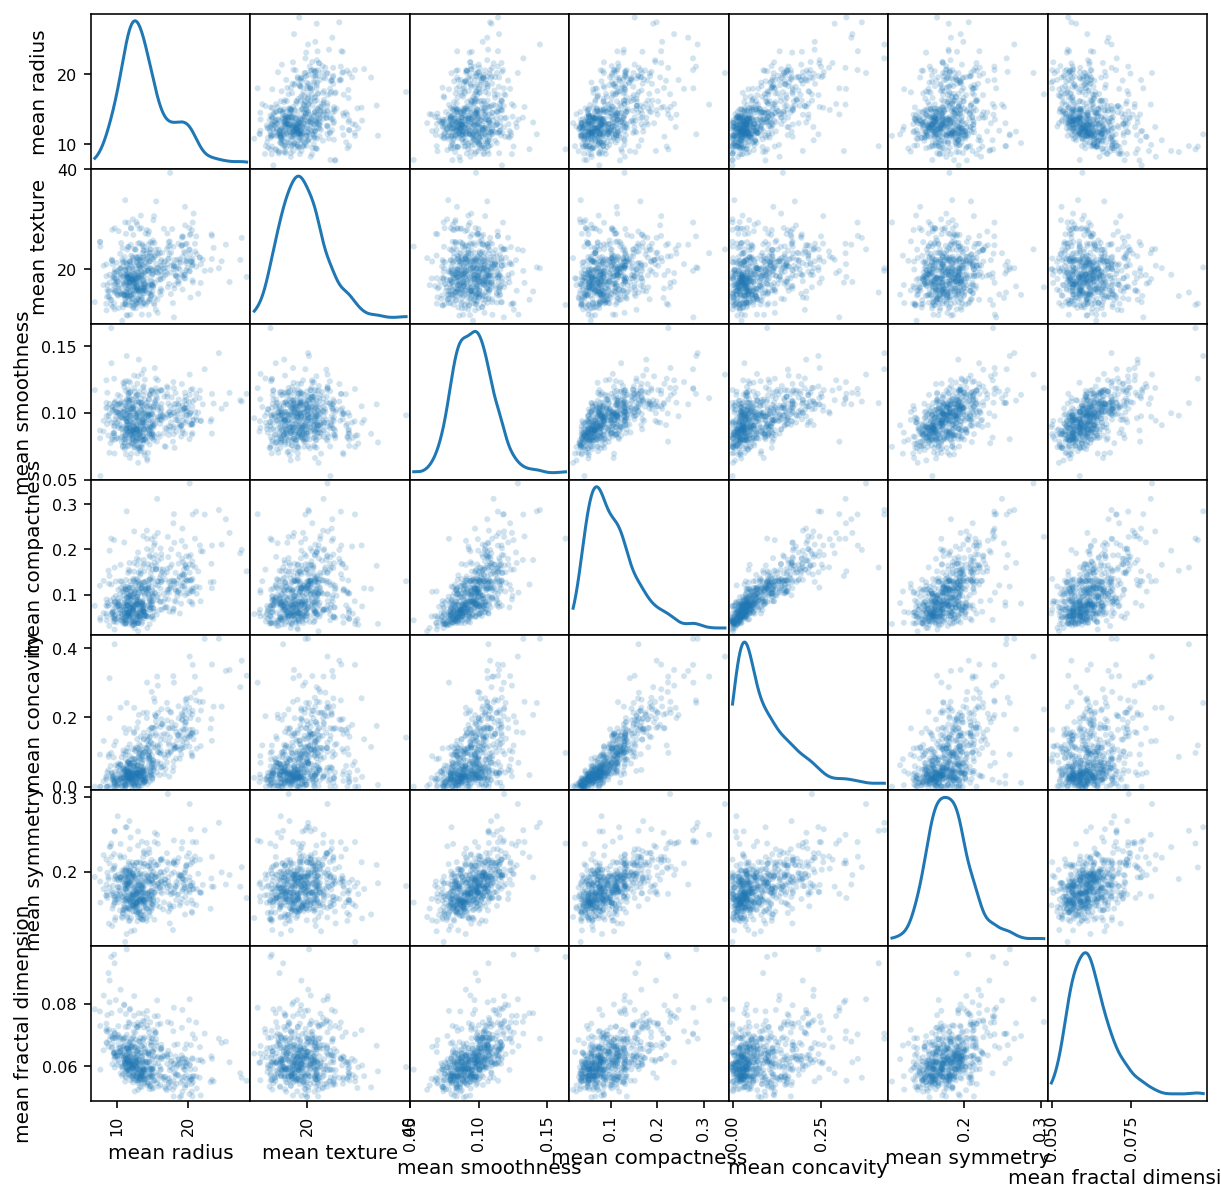

In [17]:
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df = df.drop(df[to_drop], axis=1)

to_drop = [column for column in df.columns if not column.startswith('mean')]
df = df.drop(to_drop, axis=1)

scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

## 3. Train a Decision Tree classifier

* Train a Decision Tree Classifier (e.g. using 0.8/0.2 division of the data for training and testing)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier on the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Test the classifier on the testing data and evaluate its accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9298245614035088


## 4. Evaluate the performance of the classifier

   * Elaborate on the different type of errors your classifier is making and use different metrics to have a complete picture of the model behavior.   
   * Look at its confusion matrix
   * Print its classification report (classification_report)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Test the classifier on the testing data and make predictions
y_pred = clf.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[40  3]
 [ 5 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## 5. Optimization

   * Explore the hyperparameters space looking for the configuration that optimizes the model performance. 
   * Use GridSearchCV to identify the optimal hyperparameters, e.g. with depth ranging between 0-20 and CV=5
   * Use sklearn.model_selection.learning_curve() to compute optimal hyperparameter of optimal training set size
   * Plot the train_scores and test_scores as the function of training size

Optimal hyperparameters: {'max_depth': 2}
Cross-validation score: 0.9279614966620089


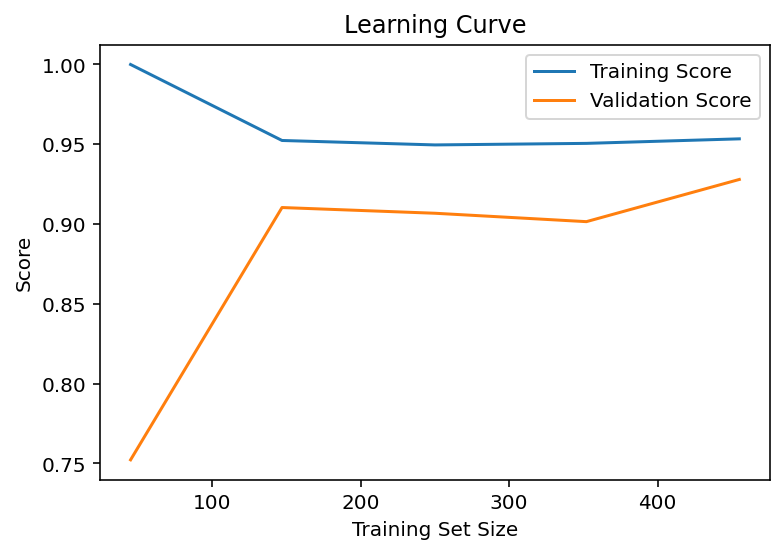

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
import matplotlib.pyplot as plt

# Define the hyperparameter grid
param_grid = {'max_depth': range(1, 21)}

# Perform grid search with cross-validation
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X, y)

# Print the optimal hyperparameters and the corresponding cross-validation score
print("Optimal hyperparameters:", grid.best_params_)
print("Cross-validation score:", grid.best_score_)

# Compute the learning curve for the optimal hyperparameters
train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X, y, cv=5)

# Plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

## 6. Train an alternative classifier (K-NN) and repeat steps 4-5

Optimal hyperparameters: {'n_neighbors': 13}
Cross-validation score: 0.9332401800962584


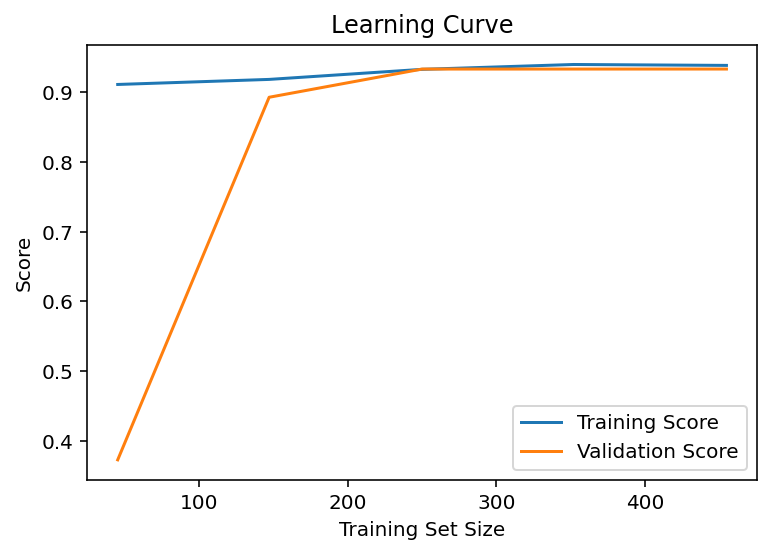

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Create a K-NN classifier
clf = KNeighborsClassifier()

# Perform grid search with cross-validation
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X, y)

# Print the optimal hyperparameters and the corresponding cross-validation score
print("Optimal hyperparameters:", grid.best_params_)
print("Cross-validation score:", grid.best_score_)

# Compute the learning curve for the optimal hyperparameters
train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X, y, cv=5)

# Plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

## 7. Decide which approach to use if you were asked to solve the problem in a real case
   * Optimize KNN and DT by reading the validation curve
   * Optimize KNN and DT by gridsearch

I would try a combination of both approaches to optimize the classifiers.

First, I will use a validation curve to determine the optimal hyperparameters for each classifier. A validation curve plots the performance of a classifier as a function of a single hyperparameter value, while holding all other hyperparameters constant. This can help identify regions of the hyperparameter space that lead to good performance, and avoid regions that lead to overfitting or underfitting. For example, we could plot the training and validation scores for different values of the max_depth hyperparameter for the decision tree, or the n_neighbors hyperparameter for the K-NN classifier.

If the validation curve suggests that there is a range of hyperparameters that lead to good performance, I will then use GridSearchCV to perform a more systematic search over the hyperparameter space. GridSearchCV exhaustively searches over a user-defined grid of hyperparameters and performs cross-validation to estimate the performance of each configuration. This can be computationally expensive, but it ensures that we explore the entire hyperparameter space and can identify the optimal configuration.

In [ ]:
#Optimize KNN and DT by reading the validation curve



In [ ]:
#Optimize KNN and DT by gridsearch

